## $\displaystyle\mathrm{Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As}$ Structure


No protocol specified


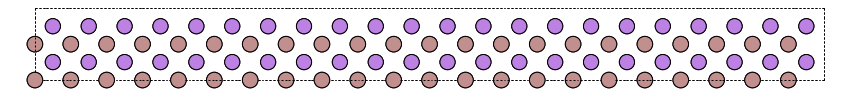

In [1]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io.cif import read_cif
from ase.io.xyz import write_xyz
from ase.io import read, write
from ase.io.xsf import read_xsf, write_xsf
from ase.build import make_supercell, bulk
import numpy as np
from ase import Atoms
from ase.lattice import *
from ase.dft.kpoints import *
from ase.optimize import BFGS,LBFGS
from gpaw import GPAW, PW, FermiDirac 
from ase.constraints import ExpCellFilter
from ase.spacegroup.symmetrize import check_symmetry

plt.rcParams['axes.facecolor']= 'none'
plt.rcParams['figure.facecolor'] = 'none'

a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
atoms =GaAs
atoms.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
atoms *=(2,1,11)
plt.figure(figsize=(15,10))
ax0 = plot_atoms(atoms,
           radii=0.5,
           rotation='0x,90y,0z',
            )
ax0.set_axis_off()

In [3]:
for atom in atoms[::5]:
    print(atom)

Atom('Ga', [0.0, 0.0, 0.0], index=0)
Atom('As', [4.221, 4.221, 1.407], index=1)
Atom('Ga', [2.814, 0.0, 8.442], index=2)
Atom('As', [1.407, 4.221, 9.849], index=3)
Atom('As', [1.407, 1.407, 12.663], index=4)
Atom('Ga', [0.0, 2.814, 19.698], index=5)
Atom('As', [4.221, 1.407, 21.105], index=6)
Atom('Ga', [2.814, 2.814, 22.512], index=7)
Atom('Ga', [0.0, 0.0, 28.14], index=8)
Atom('As', [4.221, 4.221, 29.547], index=9)
Atom('Ga', [2.814, 0.0, 36.582], index=10)
Atom('As', [1.407, 4.221, 37.989000000000004], index=11)
Atom('As', [1.407, 1.407, 40.803], index=12)
Atom('Ga', [0.0, 2.814, 47.838], index=13)
Atom('As', [4.221, 1.407, 49.245000000000005], index=14)
Atom('Ga', [2.814, 2.814, 50.652], index=15)
Atom('Ga', [0.0, 0.0, 56.28], index=16)
Atom('As', [4.221, 4.221, 57.687], index=17)
Atom('Ga', [8.442, 0.0, 2.814], index=18)
Atom('As', [7.035, 4.221, 4.221], index=19)
Atom('As', [7.035, 1.407, 7.035], index=20)
Atom('Ga', [5.628, 2.814, 14.07], index=21)
Atom('As', [9.849, 1.407, 15.4

In [ ]:
view(atoms)

In [ ]:
!pwd

In [30]:
!ls ../symmetry/*.cif

../symmetry/AlGaAs01.cif  ../symmetry/AlGaAs05.cif	   ../symmetry/st1.cif
../symmetry/AlGaAs02.cif  ../symmetry/AlGaAs06.cif	   ../symmetry/st2.cif
../symmetry/AlGaAs03.cif  ../symmetry/AlGaAs07.cif	   ../symmetry/st3.cif
../symmetry/AlGaAs04.cif  ../symmetry/scqws-symmetry0.cif


In [ ]:
algaas = read('../symmetry/AlGaAs01.cif')
plt.figure(figsize=(7,5))
ax0 = plot_atoms(algaas,
           radii=0.5,
           rotation='0x,90y,10z',
            )
ax0.set_axis_off()

In [ ]:
view(algaas)

In [ ]:
from ase.spacegroup.symmetrize import check_symmetry
check_symmetry(algaas)

## $\displaystyle\mathrm{Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As}$ Symmetric CQW's

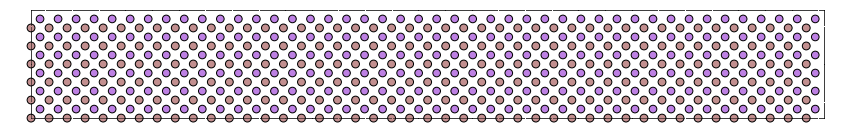

In [31]:
a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
scqws =GaAs
scqws.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
scqws *=(3,1,22)
plt.figure(figsize=(15,5))
ax0 = plot_atoms(scqws,
           radii=0.5,
           rotation='90x,0y,90z',
            )
ax0.set_axis_off()

In [32]:
view(scqws)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

<h2 align='center'> 
From structure basis, trough ase gui modify Ga to Al atoms.
   </h2>

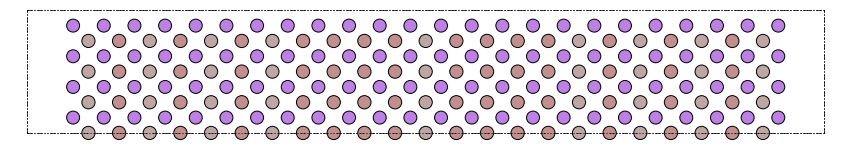

In [67]:
sym_scqws = read('../symmetry/scqws-symmetry0.cif')
plt.figure(figsize=(15,5))
ax = plot_atoms(sym_scqws,
           radii=0.5,
           rotation='90x,0y,90z',
            )
ax.set_axis_off()

In [68]:
symmetry = check_symmetry(sym_scqws)

for i in ['number','hall_number', 'international','hall']:
    print('%s:%s'%(i,symmetry[i]))

number:115
hall_number:392
international:P-4m2
hall:P -4 -2


In [69]:
view(sym_scqws)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

<h2 align='center'> 
    $\displaystyle\mathrm{Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As/GaAs/Al_{x}Ga_{1-x}As}$ Structure
</h2>

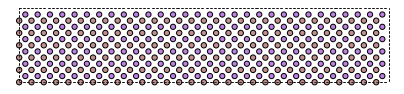

In [45]:

a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)], 
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
atoms =GaAs
atoms.pbc = (False, False, True)
#atoms.center(vacuum=1.0, axis=2)
atoms *=(3,1,15)
plt.figure(figsize=(7,5))
ax0 = plot_atoms(atoms,
           radii=0.5,
           rotation='90x,0y,90z',
            )
ax0.set_axis_off()

In [43]:
!ls ../symmetry/*.cif

../symmetry/acqws-symmetry0.cif  ../symmetry/AlGaAs07.cif
../symmetry/AlGaAs01.cif	 ../symmetry/scqws-symmetry0.cif
../symmetry/AlGaAs02.cif	 ../symmetry/scqws-symmetry1.cif
../symmetry/AlGaAs03.cif	 ../symmetry/scqws-symmetry2.cif
../symmetry/AlGaAs04.cif	 ../symmetry/st1.cif
../symmetry/AlGaAs05.cif	 ../symmetry/st2.cif
../symmetry/AlGaAs06.cif	 ../symmetry/st3.cif


In [46]:
view(atoms)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

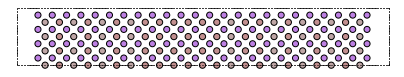

In [70]:
algaas2 = read('../symmetry/acqws-symmetry0.cif')
plt.figure(figsize=(7,7))
ax0 = plot_atoms(algaas2,
           radii=0.5,
           rotation='90x,0y,90z',
            )
ax0.set_axis_off()

In [52]:
view(algaas2)

<Popen: returncode: None args: ['/home/ruco/anaconda3/envs/ase/bin/python', ...>

In [71]:
from ase.spacegroup.symmetrize import check_symmetry
check_symmetry(algaas2)

{'number': 25,
 'hall_number': 125,
 'international': 'Pmm2',
 'hall': 'P 2 -2',
 'choice': '',
 'transformation_matrix': array([[-2., -1.,  0.],
        [-2.,  1.,  0.],
        [ 0.,  0., -1.]]),
 'origin_shift': array([0., 0., 0.]),
 'rotations': array([[[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]],
 
        [[ 1,  0,  0],
         [ 0,  1,  0],
         [ 0,  0,  1]],
 
        [[-1,  0,  0],
         [ 0, -1,  0],
         [ 0,  0,  1]]], dtype=int32),
 'translations': array([[-0.  ,  0.  ,  0.  ],
        [-0.  ,  0.  ,  0.  ],
        [ 0.75,  0.5 ,  0.  ],
        [ 0.75,  0.5 ,  0.  ],
        [ 0.5 ,  0.  ,

In [ ]:
import spglib

from pyspglib import spglib
lattice=algaas2.cell[:]

positions = algaas2.get_positions()
numbers = algaas2.get_atomic_numbers()
magmoms =None
cell = (lattice, positions, numbers)
cell

In [ ]:
symmetry = spglib.get_spacegroup(cell, symprec=1e-5)